<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/Day13_15_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-4d3201cc7eb5>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2000-01-01', periods=len(data), freq='M'),


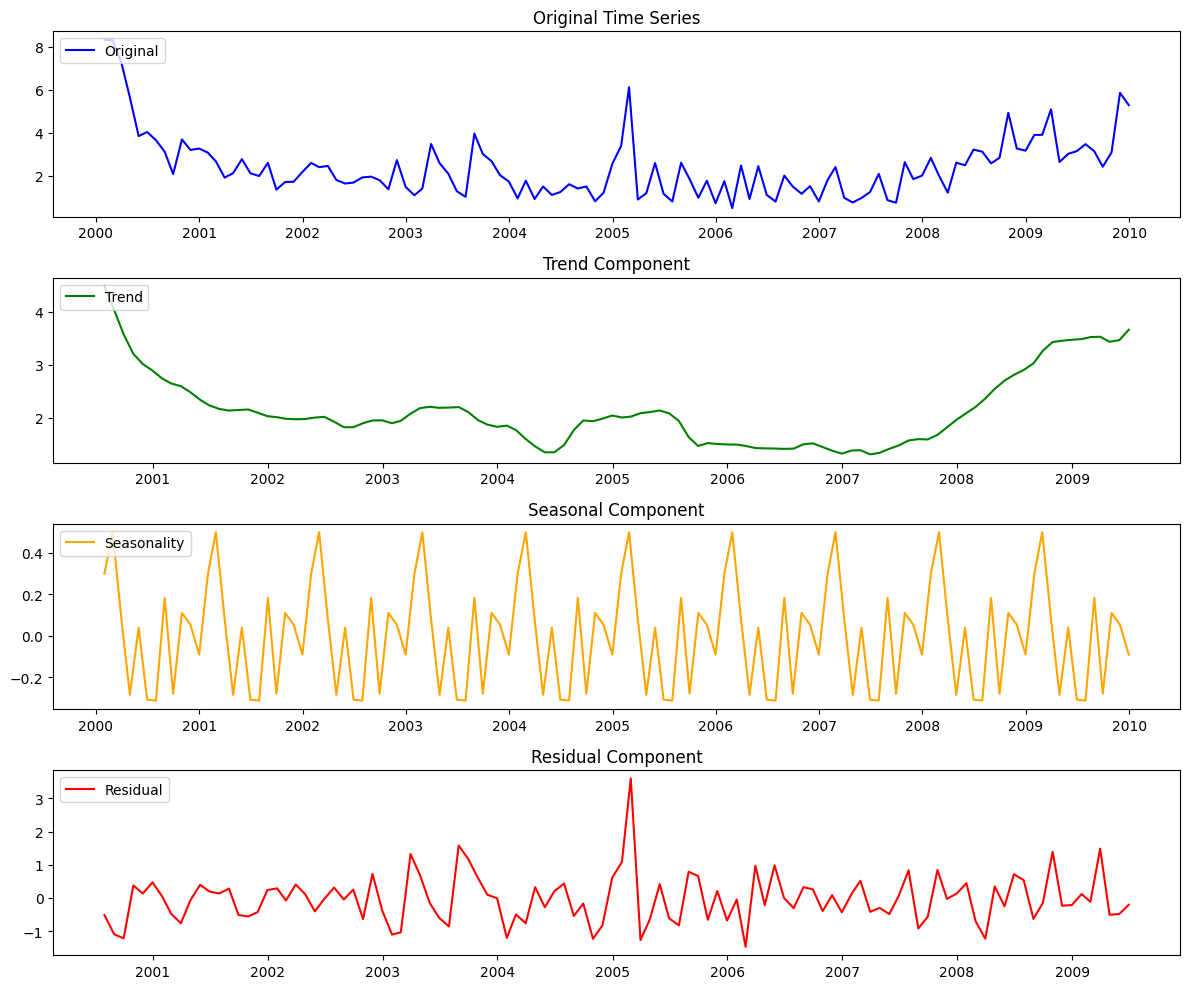

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load California Housing Dataset
housing = fetch_california_housing(as_frame=True)
data = housing['data']['MedInc'][:120]  # Truncate to the first 120 data points (10 years of monthly data)

# Simulate a Time Series
time_series_data = pd.DataFrame({
    'Date': pd.date_range(start='2000-01-01', periods=len(data), freq='M'),
    'Value': data
}).set_index('Date')

# Step 2: Decompose the Time Series
time_series = time_series_data['Value']  # Extract the series for decomposition
decomposition = seasonal_decompose(time_series, model='additive', period=12)  # Assume monthly periodicity

# Extract Components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Step 3: Plot the Components
plt.figure(figsize=(12, 10))

# Original Time Series
plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original', color='blue')
plt.title('Original Time Series')
plt.legend(loc='upper left')

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend(loc='upper left')

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

# Residual Component
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


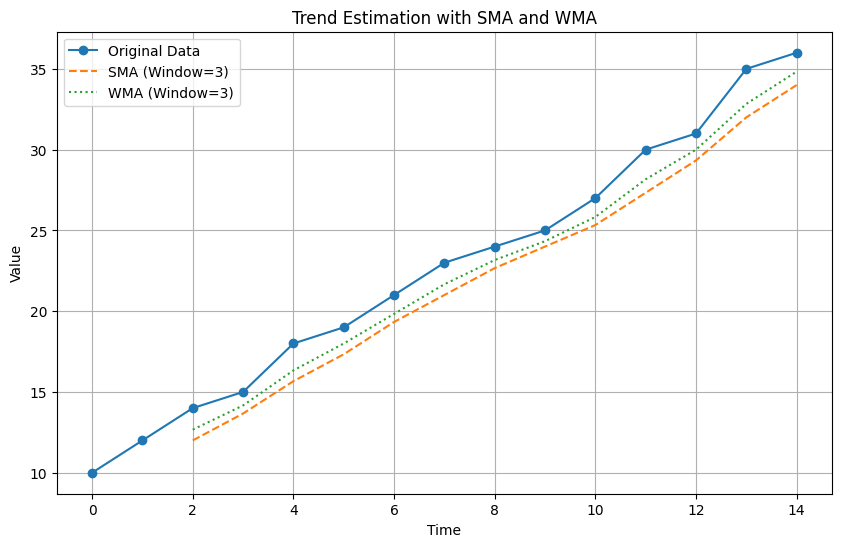

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: A time series (can be replaced with your dataset)
data = [10, 12, 14, 15, 18, 19, 21, 23, 24, 25, 27, 30, 31, 35, 36]
time_series = pd.Series(data)

# Simple Moving Average (SMA) function
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

# Weighted Moving Average (WMA) function
def calculate_wma(data, window):
    weights = np.arange(1, window + 1)
    return data.rolling(window=window).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Parameters
window_size = 3  # Adjust the window size as needed

# Calculate SMA and WMA
sma = calculate_sma(time_series, window_size)
wma = calculate_wma(time_series, window_size)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(time_series, label="Original Data", marker="o")
plt.plot(sma, label=f"SMA (Window={window_size})", linestyle="--")
plt.plot(wma, label=f"WMA (Window={window_size})", linestyle=":")
plt.title("Trend Estimation with SMA and WMA")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


<ipython-input-3-0cc6f2ab1af4>:19: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, optimized=False)


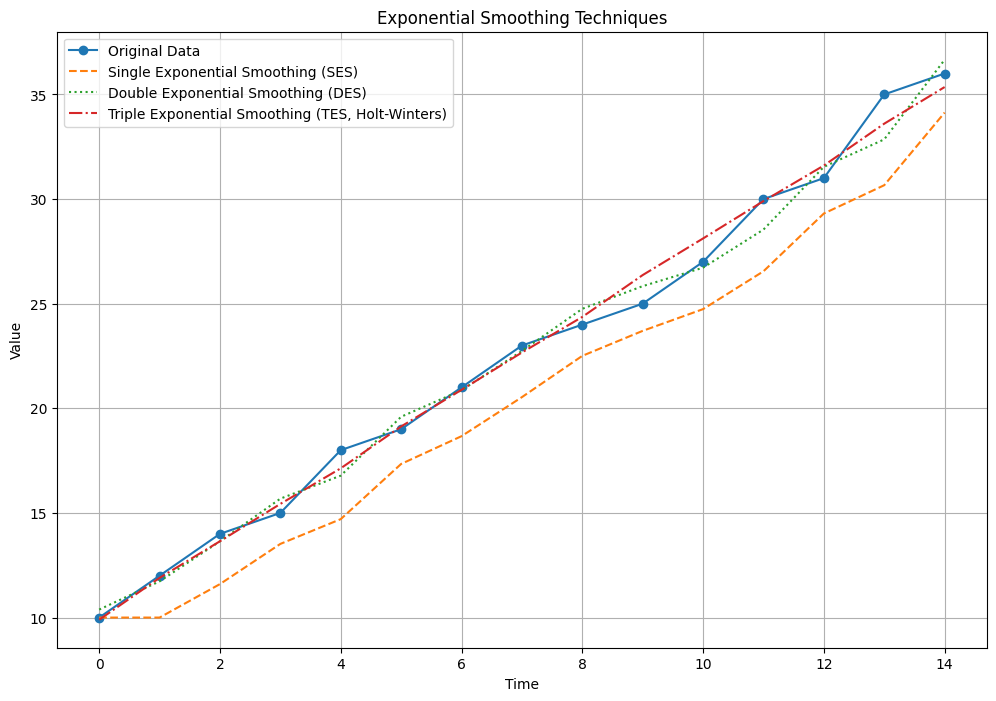

SES Forecast: 15    35.626477
16    35.626477
17    35.626477
dtype: float64
DES Forecast: 15    38.114646
16    40.097530
17    42.080414
dtype: float64
TES Forecast: 15    37.137215
16    38.838271
17    40.838230
dtype: float64


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Sample data: A time series (can be replaced with your dataset)
data = [10, 12, 14, 15, 18, 19, 21, 23, 24, 25, 27, 30, 31, 35, 36]
time_series = pd.Series(data)

# 1. Single Exponential Smoothing (SES)
def single_exponential_smoothing(data, smoothing_level=0.8):
    model = SimpleExpSmoothing(data)
    fitted_model = model.fit(smoothing_level=smoothing_level, optimized=False)
    return fitted_model.fittedvalues, fitted_model.forecast(steps=3)

# 2. Double Exponential Smoothing (DES)
def double_exponential_smoothing(data, trend="add", smoothing_level=0.8, smoothing_slope=0.2):
    model = ExponentialSmoothing(data, trend=trend, seasonal=None)
    fitted_model = model.fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, optimized=False)
    return fitted_model.fittedvalues, fitted_model.forecast(steps=3)

# 3. Triple Exponential Smoothing (Holt-Winters, TES)
def triple_exponential_smoothing(data, trend="add", seasonal="add", seasonal_periods=4):
    model = ExponentialSmoothing(data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fitted_model = model.fit(optimized=True)
    return fitted_model.fittedvalues, fitted_model.forecast(steps=3)

# Apply smoothing methods
smoothing_level = 0.8
smoothing_slope = 0.2
seasonal_periods = 4

ses_fitted, ses_forecast = single_exponential_smoothing(time_series, smoothing_level)
des_fitted, des_forecast = double_exponential_smoothing(time_series, "add", smoothing_level, smoothing_slope)
tes_fitted, tes_forecast = triple_exponential_smoothing(time_series, "add", "add", seasonal_periods=seasonal_periods)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(time_series, label="Original Data", marker="o")
plt.plot(ses_fitted, label="Single Exponential Smoothing (SES)", linestyle="--")
plt.plot(des_fitted, label="Double Exponential Smoothing (DES)", linestyle=":")
plt.plot(tes_fitted, label="Triple Exponential Smoothing (TES, Holt-Winters)", linestyle="-.")
plt.title("Exponential Smoothing Techniques")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Forecast Output
print("SES Forecast:", ses_forecast)
print("DES Forecast:", des_forecast)
print("TES Forecast:", tes_forecast)
